In [20]:
import itertools
import operator
import sys
import os
import numpy as np
sys.path.append("../src")
from glob import glob
import pandas as pd
import json
from neuraldb.dataset.base_reader import NeuralDatabaseDatasetReader
from neuraldb.dataset.generators.v0_4_database_reader import V4DatabaseSpecificReader
from matplotlib import pyplot as plt

In [21]:
search_root = "/checkpoint/jth/job_staging/neuraldb_expts/experiment=fusion_sweep"
checkpoint_name = "metrics.json"
files = glob("{}*/**/{}".format(search_root,checkpoint_name), recursive=True)


print(len(files))

720


In [22]:
def expand(idx,chunk):

  #elif idx == 1:
  #  return ["experiment={}".format(chunk)]
  if chunk.startswith("seed-"):
    return ["seed={}".format(chunk.replace("seed-",""))]
  elif "," in chunk:
    return chunk.split(",")
  elif "=" in chunk:
    return [chunk]
  return []

experiments = []
for file in files:
    chunks = file.replace(search_root,"").split("/")
    chunks = itertools.chain(*[expand(idx, chunk) for idx, chunk in enumerate(chunks)])

    data = {k:v for k,v in (chunk.split("=") for chunk in chunks)}
    data["file"] = file
    data['dir'] = os.path.dirname(file)
    data["filter_size"] = int(data["filter_size"])
    data["lr"] = float(data["lr"])
    data["context"] = int(data["context"])
    experiments.append(data)

In [16]:
for experiment in experiments:
    with open(experiment['file']) as f:
        metrics = json.load(f)

    epoch_em = [epoch["EM"] for epoch in metrics["validation"]]

    best_epoch_num = np.argmax(epoch_em)
    metrics = {"best_validation_epoch": metrics["validation"][best_epoch_num]["epoch"],
       "best_validation_em": metrics["validation"][best_epoch_num]["EM"],
       "best_validation_loss": metrics["validation"][best_epoch_num]["avg_val_loss"]
    }

    experiment.update(metrics)

In [17]:
results = pd.DataFrame(experiments).fillna(0)
cols = {col:[np.mean, np.std] for col in filter(lambda col: col == "EM",results.columns)}
breakdown = pd.pivot_table(results, index=["model","context","version","lr"],columns=["filter_size"],aggfunc={"best_validation_em":[np.mean,np.std]})
breakdown

best_validation_em                      \
                                              mean                       
filter_size                                     1         2         4    
model   context version lr                                               
t5-base 50      v0.4    0.00008           0.807525  0.779538  0.769491   
        100     v0.4    0.00008           0.812242  0.783134  0.778453   
        500     v0.4    0.00008           0.827257  0.795221  0.785659   
                v0.5    0.00008           0.818483  0.787580  0.781257   
        1000    v0.4    0.00008           0.816575  0.779221  0.774437   
                v0.5    0.00008           0.000000  0.000000  0.000000   
        2000    v0.4    0.00008           0.823007  0.782947  0.775408   
                v0.5    0.00008           0.817506  0.780558  0.778843   
        5000    v0.4    0.00008           0.808158  0.766347  0.766573   
                v0.5    0.00008           0.807254  0.768177  0.768431   
        7000    v0.4    0.00008           0.799631  0.767796  0.761217   
                v0.5    0.00008           0.801453  0.769298  0.767554   
        10000   v0.4    0.00008           0.820713  0.780935  0.778086   
                v0.5    0.00008           0.797829  0.764423  0.754852   

                                                                         \
                                                                          
filter_size                            6         8         12        16   
model   context version lr                                                
t5-base 50      v0.4    0.00008  0.770808  0.767446  0.769482  0.771400   
        100     v0.4    0.00008  0.776875  0.778647  0.779837  0.774575   
        500     v0.4    0.00008  0.788569  0.788026  0.786385  0.785691   
                v0.5    0.00008  0.782925  0.777501  0.776139  0.774816   
        1000    v0.4    0.00008  0.777516  0.775625  0.775188  0.768012   
                v0.5    0.00008  0.000000  0.000000  0.000000  0.000000   
        2000    v0.4    0.00008  0.773067  0.774463  0.772502  0.765962   
                v0.5    0.00008  0.777156  0.779022  0.777403  0.774233   
        5000    v0.4    0.00008  0.768157  0.768875  0.767584  0.766313   
                v0.5    0.00008  0.767946  0.766123  0.768830  0.755352   
        7000    v0.4    0.00008  0.763065  0.762062  0.760353  0.761361   
                v0.5    0.00008  0.767941  0.762409  0.759962  0.759496   
        10000   v0.4    0.00008  0.778181  0.778087  0.776482  0.775644   
                v0.5    0.00008  0.750971  0.755302  0.749435  0.752415   

                                                                         \
                                                          std             
filter_size                            24        32        1         2    
model   context version lr                                                
t5-base 50      v0.4    0.00008  0.770649  0.770496  0.001814  0.003495   
        100     v0.4    0.00008  0.772654  0.773403  0.003576  0.006182   
        500     v0.4    0.00008  0.776672  0.771294  0.001874  0.003663   
                v0.5    0.00008  0.764881  0.761783  0.002233  0.002155   
        1000    v0.4    0.00008  0.752221  0.757419  0.001466  0.001175   
                v0.5    0.00008  0.000000  0.000000  0.000000  0.000000   
        2000    v0.4    0.00008  0.759577  0.763531  0.001813  0.002202   
                v0.5    0.00008  0.768223  0.762790  0.002294  0.002686   
        5000    v0.4    0.00008  0.761265  0.749263  0.001166  0.002917   
                v0.5    0.00008  0.760668  0.748526  0.001237  0.001869   
        7000    v0.4    0.00008  0.751309  0.739586  0.004596  0.006903   
                v0.5    0.00008  0.761191  0.754736  0.004667  0.006299   
        10000   v0.4    0.00008  0.765226  0.572966  0.001889  0.001400   
                v0.5    0.00008  0.755973  0.744619  0.001111  0.001703  

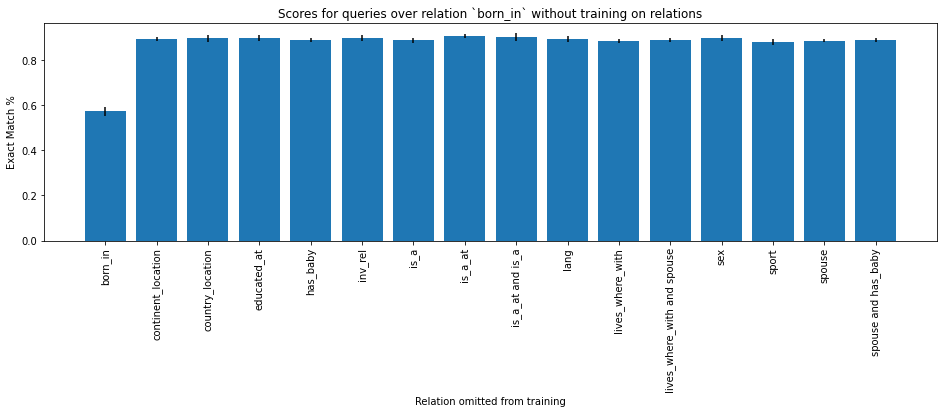

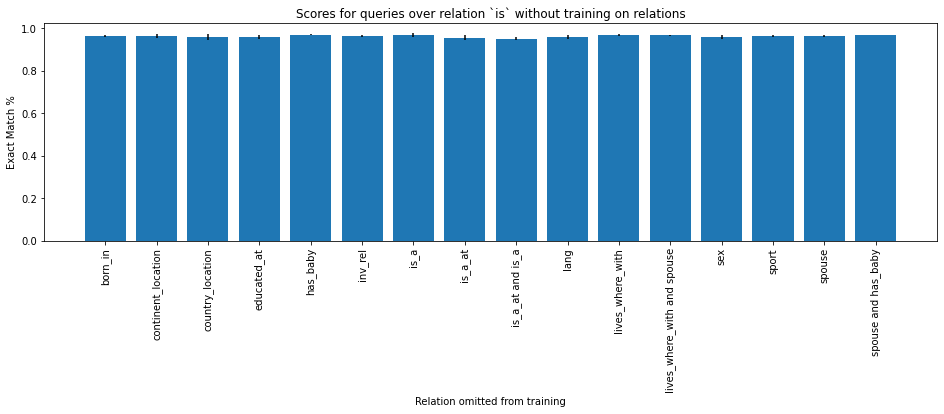

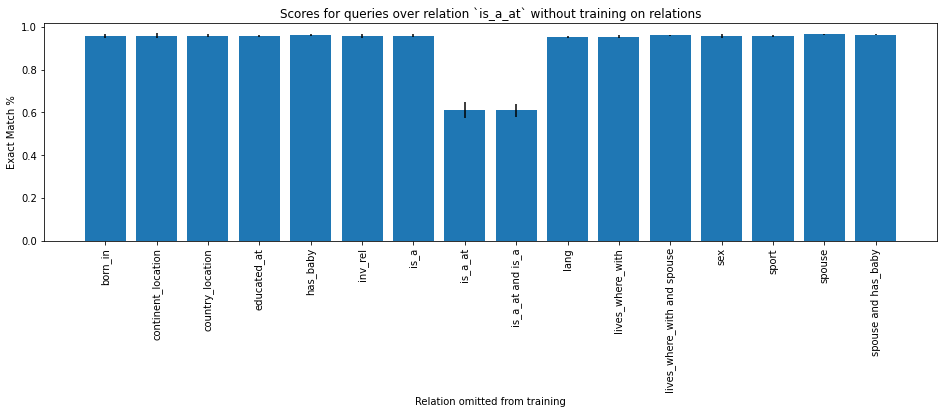

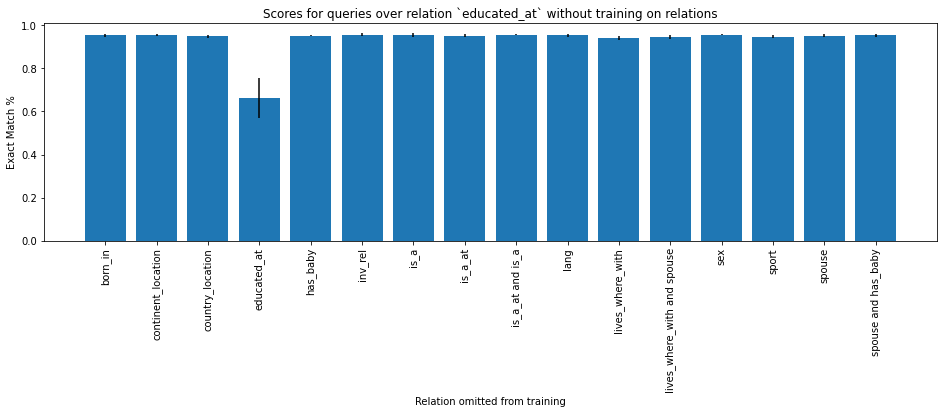

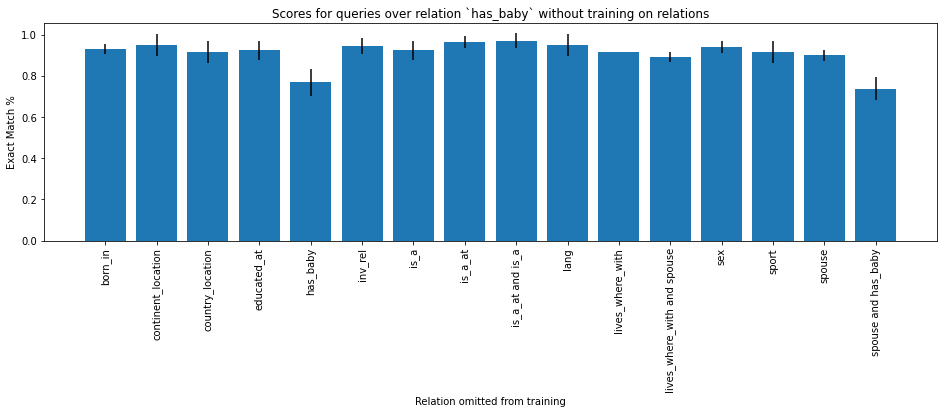

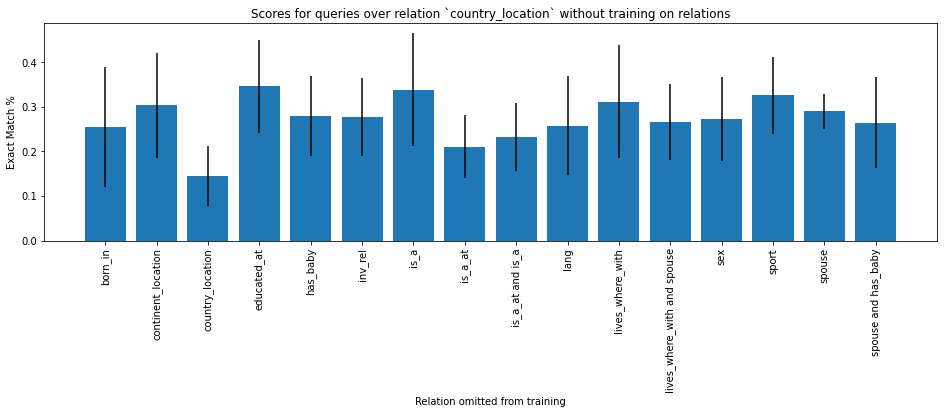

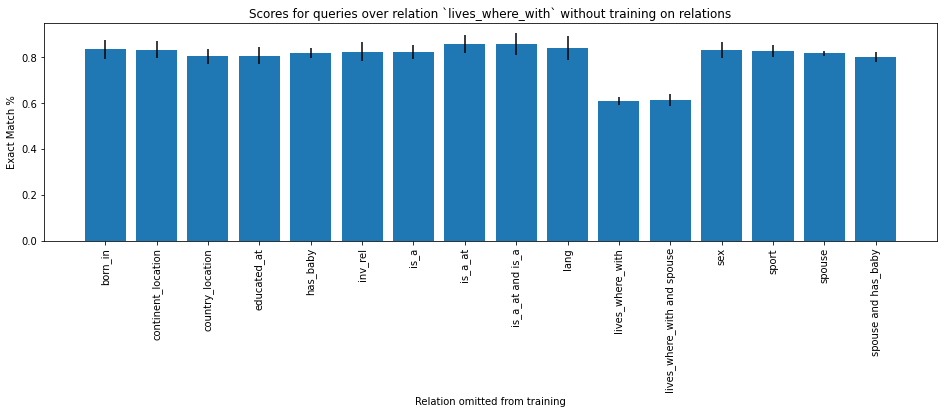

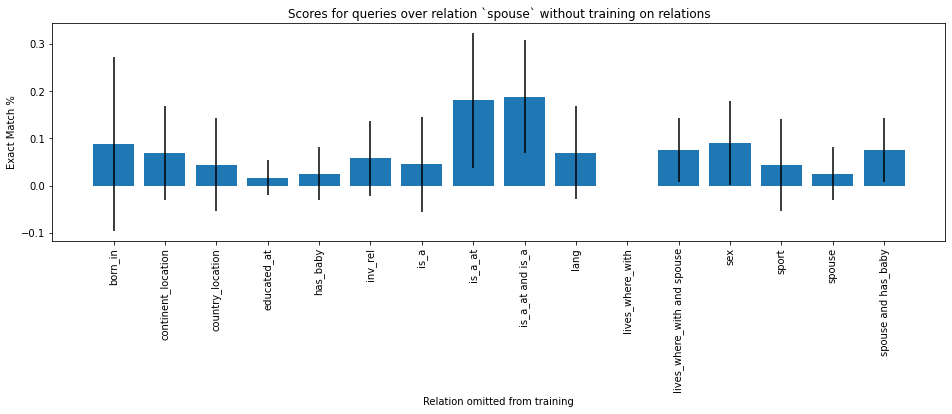

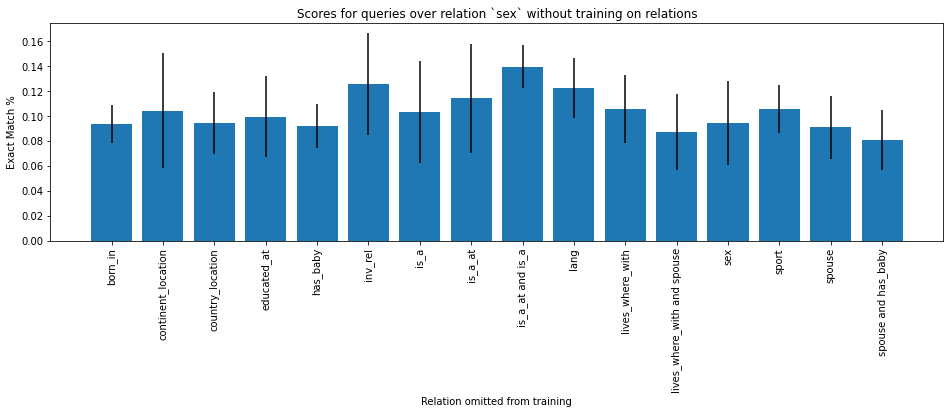

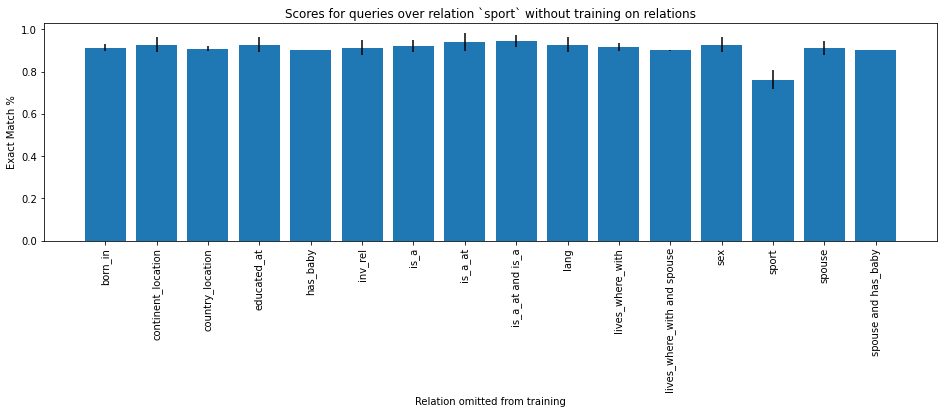

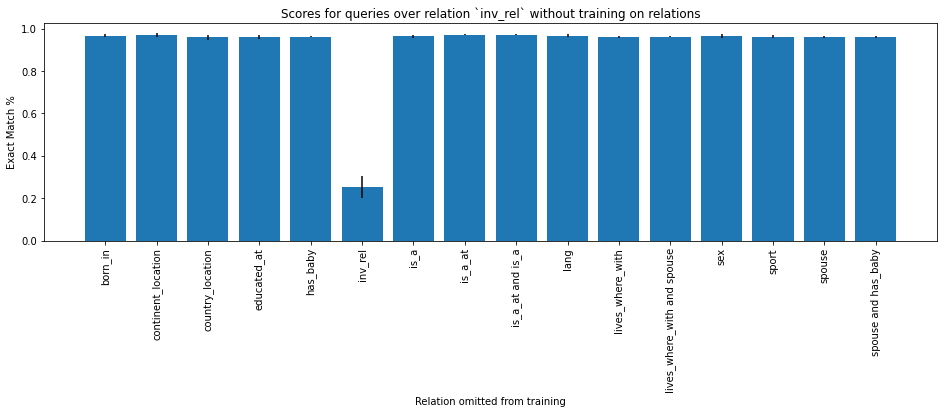

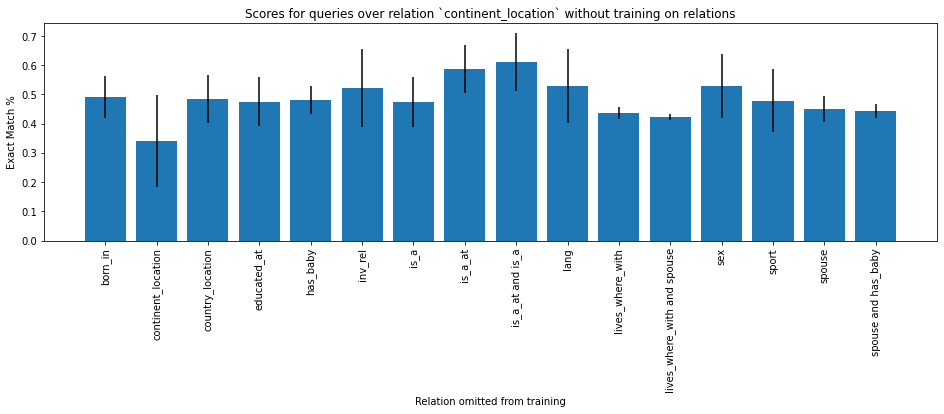

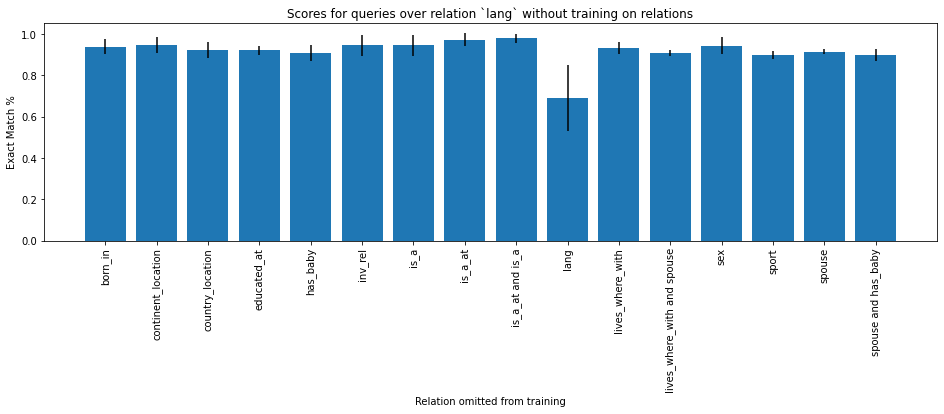

In [135]:
for col in breakdown_cols:

    means = breakdown[col]["mean"].T["t5-base"]["500"]
    std = breakdown[col]["std"].T["t5-base"]["500"]
    plt.figure(figsize=(16,4))
    plt.xticks(rotation=90)

    plt.title("Scores for queries over relation `{}` without training on relations".format(col.replace("breakdown_","")))
    plt.xlabel("Relation omitted from training")
    plt.ylabel("Exact Match %")
    plt.bar([i.replace('.',' and ') for i in means.index], means, yerr=std)
    plt.show()

In [136]:
experiments = []
for file in files:
    chunks = file.replace(search_root,"").split("/")
    chunks = itertools.chain(*[expand(idx, chunk) for idx, chunk in enumerate(chunks)])

    data = {k:v for k,v in (chunk.split("=") for chunk in chunks)}
    data["file"] = file
    data['dir'] = os.path.dirname(file)
    experiments.append(data)

for experiment in experiments:
    with open(experiment['file']) as f:
        results = json.load(f)

    experiment["EM"] = results['test']["EM"]

    for k,v in results['test']["raw"]["query_type"].items():
        experiment["breakdown_{}".format(k)] = np.mean(v)

results = pd.DataFrame(experiments).fillna(0)
cols = {col:[np.mean, np.std] for col in filter(lambda col: col == "EM" or col.startswith("breakdown_"),results.columns)}
breakdown_cols = list(filter(lambda col: col.startswith("breakdown_"),results.columns))
query_cols = list(filter(lambda col: col.startswith("query_"),results.columns))

breakdown = pd.pivot_table(results, index=["model","context"],columns=["filters"],aggfunc=cols)
breakdown

EM                                                  \
                     mean                                                   
filters           born_in continent_location country_location educated_at   
model   context                                                             
t5-base 100      0.830509           0.877755         0.881686    0.855849   
        50       0.807311           0.849513         0.859476    0.833642   
        500      0.864492           0.927463         0.922897    0.885168   

                                                                      \
                                                                       
filters          has_baby   inv_rel      is_a   is_a_at is_a_at.is_a   
model   context                                                        
t5-base 100      0.884814  0.863758  0.883959  0.797230     0.788900   
        50       0.863486  0.846949  0.866993  0.777541     0.774925   
        500      0.925332  0.907891  0.926605  0.835291     0.834535   

                           ... breakdown_min_max                         \
                           ...               std                          
filters              lang  ...              is_a   is_a_at is_a_at.is_a   
model   context            ...                                            
t5-base 100      0.883321  ...          0.015699  0.008160     0.015903   
        50       0.864496  ...          0.011208  0.012701     0.016130   
        500      0.921518  ...          0.069217  0.039943     0.087518   

                                                                              \
                                                                               
filters              lang lives_where_with lives_where_with.spouse       sex   
model   context                                                                
t5-base 100      0.045316         0.041199                0.019861  0.009950   
        50       0.020408         0.017932                0.006599  0.008219   
        500      0.111590         0.062569                0.036779  0.051752   

                                                     
                                                     
filters             sport    spouse spouse.has_baby  
model   context                                      
t5-base 100      0.012961  0.019620        0.014982  
        50       0.010104  0.009416        0.016357  
        500      0.040224  0.020891        0.034672  

[3 rows x 192 columns]

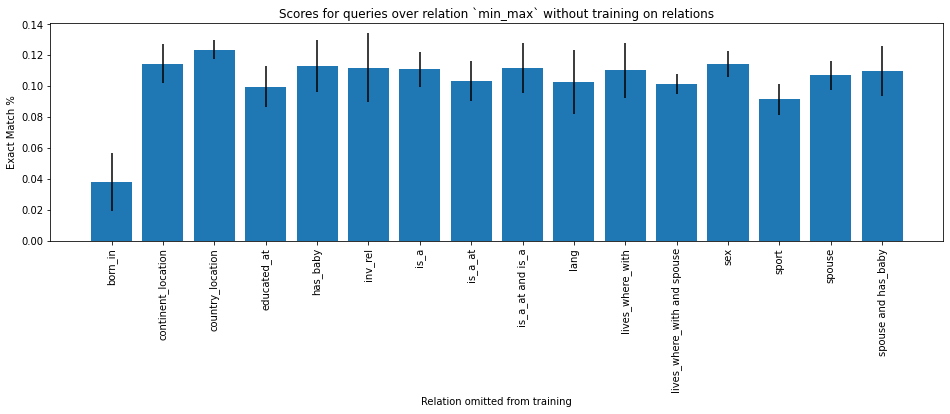

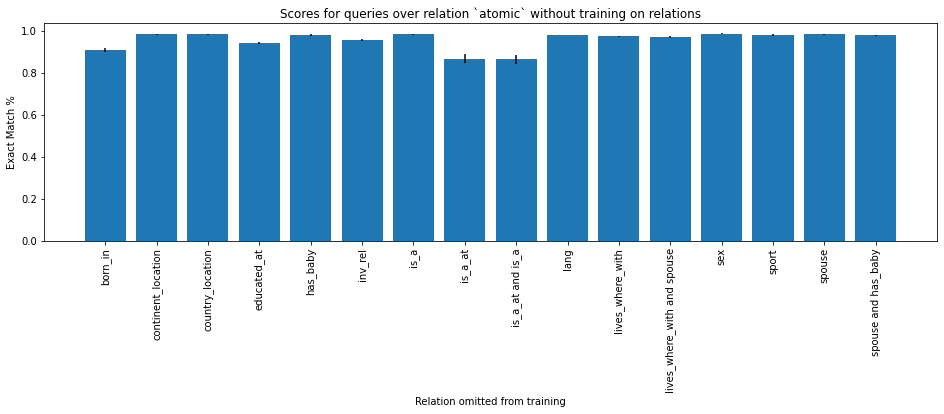

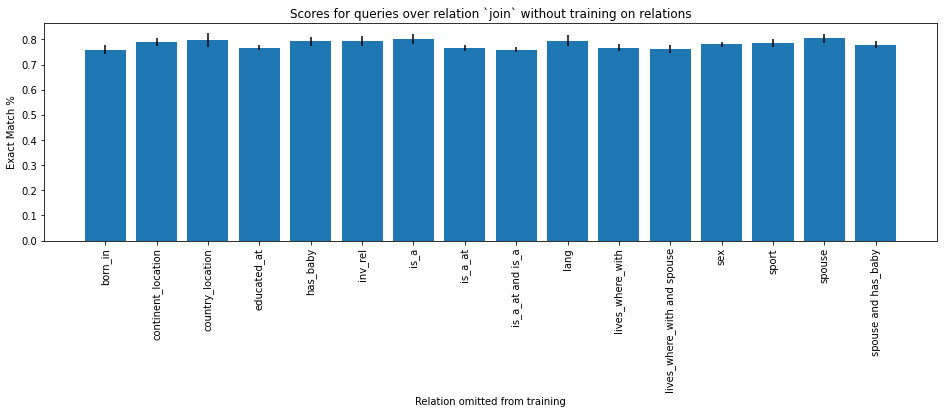

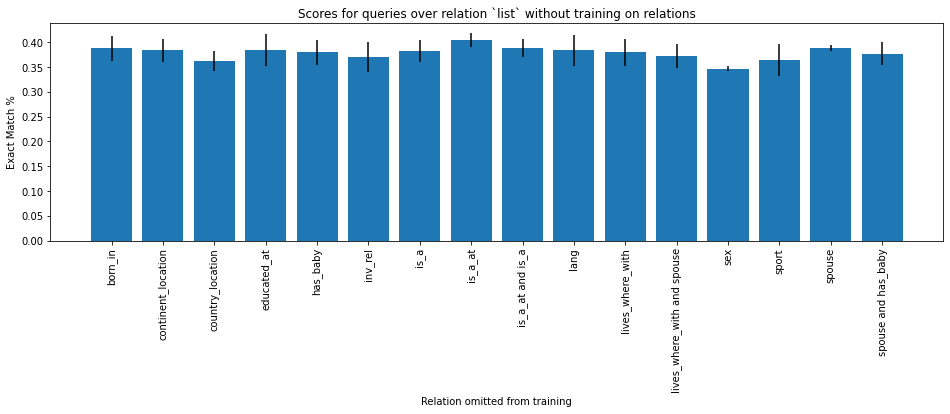

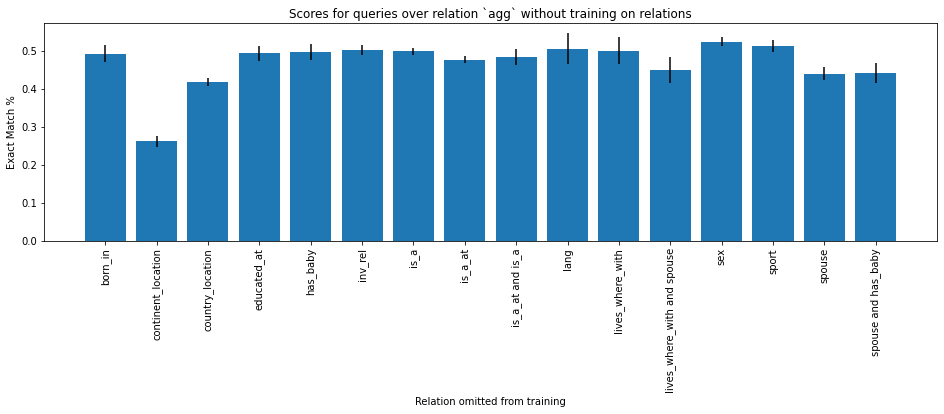

In [138]:
for col in breakdown_cols:
    means = breakdown[col]["mean"].T["t5-base"]["50"]
    std = breakdown[col]["std"].T["t5-base"]["50"]
    plt.figure(figsize=(16,4))
    plt.xticks(rotation=90)

    plt.title("Scores for queries over relation `{}` without training on relations".format(col.replace("breakdown_","")))
    plt.xlabel("Relation omitted from training")
    plt.ylabel("Exact Match %")
    plt.bar([i.replace('.',' and ') for i in means.index], means, yerr=std)
    plt.show()